In [1]:
import os
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   vmaxer import vmaxer
from   astropy.table import Table
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod

In [2]:
# gama = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold.fits')
# gama

In [3]:
gama_kE = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_kE_100k.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64
585589,588848899914203328,183.48064782,-0.15822451,19.453074,0.18341,4,G12_Y6_057_054,5,21.894562,20.52974,19.453663,18.945805,18.579258,627.2877281170306,38.987333956711154,1.0760765,0.8610029493925443,0,6,-0.004304008086476699,0.2107695500893384,0.2234659946412858,0.5710036633045628,0.7285388389050824,0.8,-0.1779077,-0.14672801,-19.57981874445852,-19.61099844078001,39.032892246045435,39.06407194236692
585591,588848899914203338,183.49789499,-0.16766405,17.603594,0.12429,5,323176188157650944,6,19.758217,18.387272,17.65539,17.203344,16.9255,408.83891632496017,38.05776114234527,0.7318821,0.6893753080282159,0,4,-0.0819652807509548,-0.03945849344225659,0.14069395795487755,0.2577107115998888,0.6148653416919028,2.12,-0.1205613,-0.2634948,-20.47429997229798,-20.33136648440583,38.07789379859193,37.93496031069978
585592,588848899914203383,183.46286329,-0.08433424,18.439117,0.179,4,G12_Y3_022_187,6,21.375816,19.530548,18.330122,17.764397,17.359926,610.4904174319889,38.92839425713693,1.2004261,0.9721022317088284,0,6,0.0058391854325142295,0.23416305540825627,0.2365374787937211,0.6269925037399601,0.8099710767383314,0.8,-0.17363001,-0.14320001,-20.552184290228098,-20.58261429422876,38.99130172186872,39.02173172586939
585600,588848899914203456,183.42823656,-0.02442331,19.335196,0.12242,4,G12_Y1_GND1_018,6,20.904034,19.648397,19.229986,18.944212,18.885782,402.17133436591314,38.02205556041388,0.41841125,0.3893481424147275,0,3,-0.10094461324771158,-0.07188150077962656,0.08028614792542539,0.12193705781293117,0.37676034499530675,2.12,-0.1187474,-0.2595304,-18.648398768700215,-18.507615771688076,37.983594310082054,37.842811313069916
585603,588848899914203511,183.50219516,-0.16954766,19.42929,0.08914,4,G12_Y3_022_170,5,20.404564,19.604887,19.355776,19.150723,19.380806,286.07271379559756,37.282382179394425,0.24911118,0.25921542614595333,0,2,-0.10249707668751229,-0.11260132729635533,0.06318190720727612,0.04488036604559115,0.26741271669879435,2.12,-0.0864658,-0.18897678,-17.82980751679894,-17.72729653553721,37.25909828828331,37.15658730702158
585607,588848899914268848,183.60160175,-0.18627266,18.615673,0.18484,4,G12_Y6_057_048,6,19.831152,19.083632,18.618288,18.319872,18.317358,632.7514193386862,39.00616564003465,0.46534348,0.3271754608358587,0,2,-0.12224092872758091,0.0159270857783622,0.04929777637773486,0.1910928313923645,0.32354842032716724,2.12,-0.1792948,-0.39186075,-20.260495556428943,-20.047929597929034,38.87616862161449,38.66360266311458
585606,588848899914268827,183.57423313,-0.07826632,17.959646,0.24766,5,4330342247851098112,6,22.035128,19.377728,17.913776,17.397978,17.044468,880.8085931674992,39.724407714803846,1.4639511,1.0187620089417166,0,6,0.1152454090575456,0.5604345109556725,0.35103175304364315,0.9608665324449894,0.8541163314384974,0.8,-0.2402302,-0.198128,-21.875563040197036,-21.91766524297013,39.83520926517262,39.87731146794572
585610,588848899914268877,183.63570571,-0.18036312,18.865356,0.20493,4,G12_Y1_HN1_145,6,20.803123,19.725954,18.848455,18.497477,18.334072,710.3851067380509,39.25746923929414,0.8774986,0.6616306307163672,0,4,-0.027243027797297995,0.1886249681953192,0.1935241661150005,0.4755138903473121,0.5955089024766728,2.12,-0.1987821,-0.43445155,-20.386854858823103,-20.151185409851355,39.2522113041356,39.01654185516385


In [4]:
def color_plot(ctype, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(gama_kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    for count, jj in enumerate(np.unique(idx)):
        sample = gama_kE[(idx == jj) & (gama_kE['MCOLOR_0P0'].data >= -23.) & (gama_kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                     sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)
    plt.xlabel(ctype)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    plt.xlim(-0.5, max_col)
    plt.legend(frameon=False)

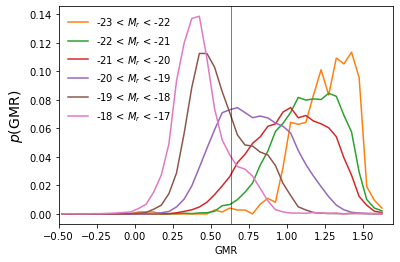

In [5]:
color_plot('GMR', max_col=1.7)

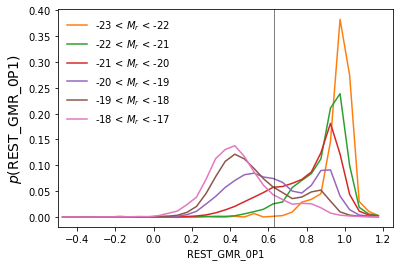

In [6]:
color_plot('REST_GMR_0P1', max_col=1.25)

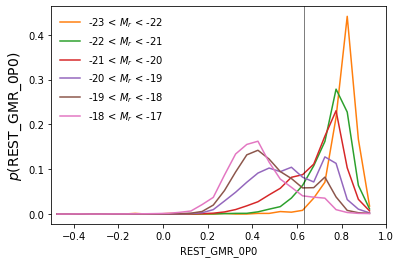

In [7]:
color_plot('REST_GMR_0P0')

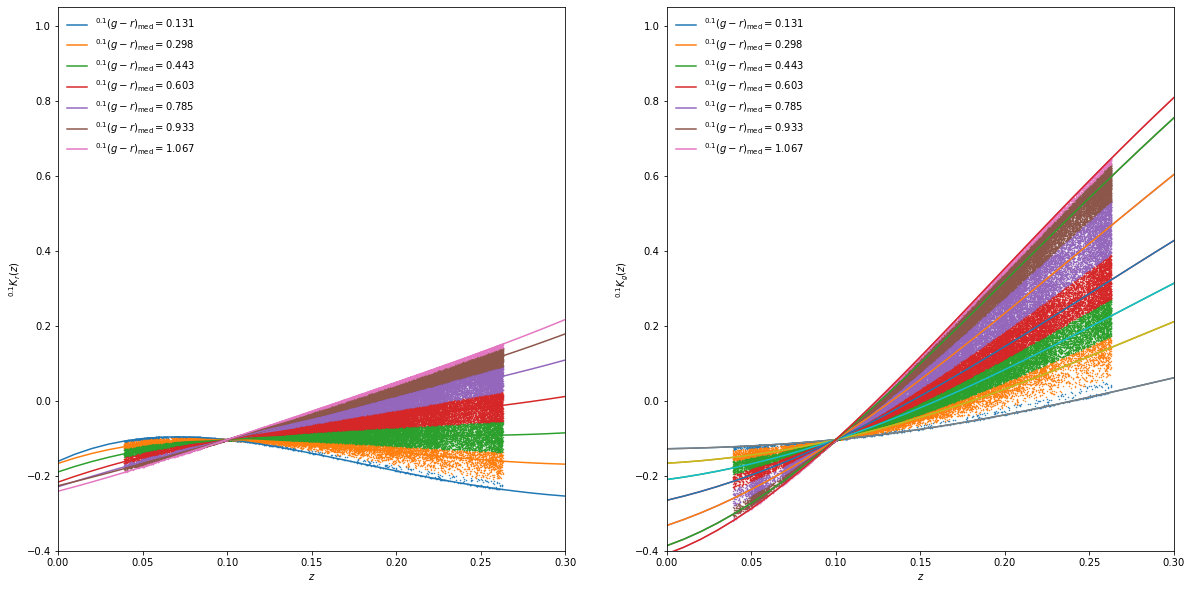

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2)

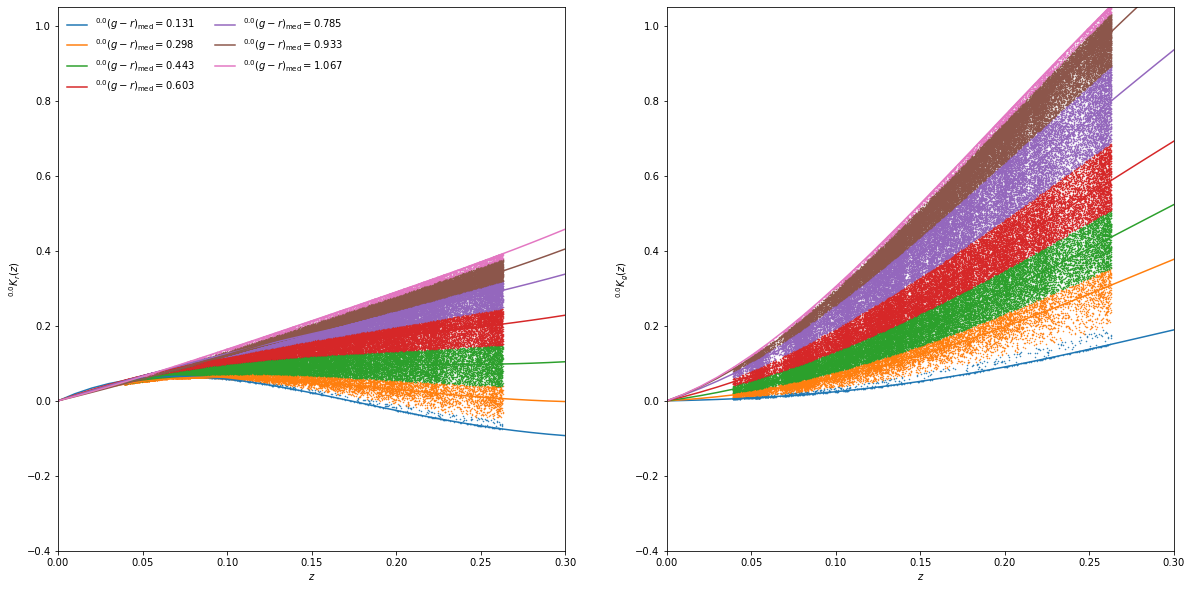

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=2, frameon=False, loc=2)

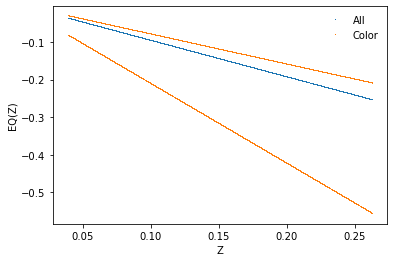

In [10]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Color')

pl.xlabel('Z')
pl.ylabel('EQ(Z)')

pl.legend(frameon=False)

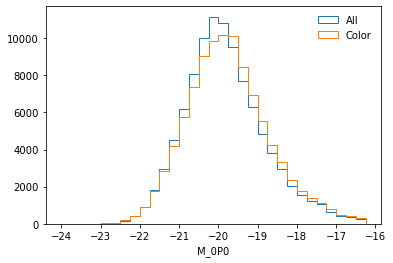

In [11]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel('M_0P0')

pl.legend(frameon=False)

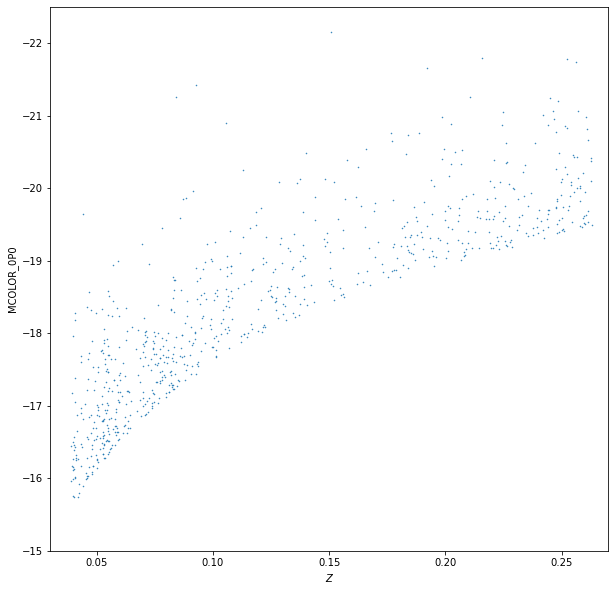

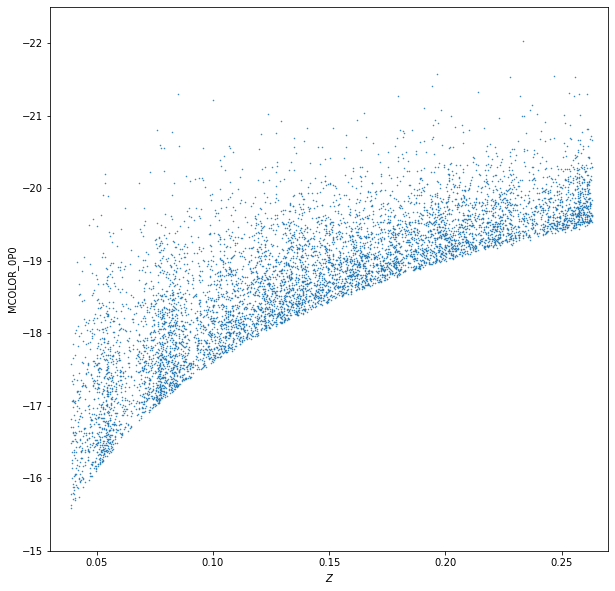

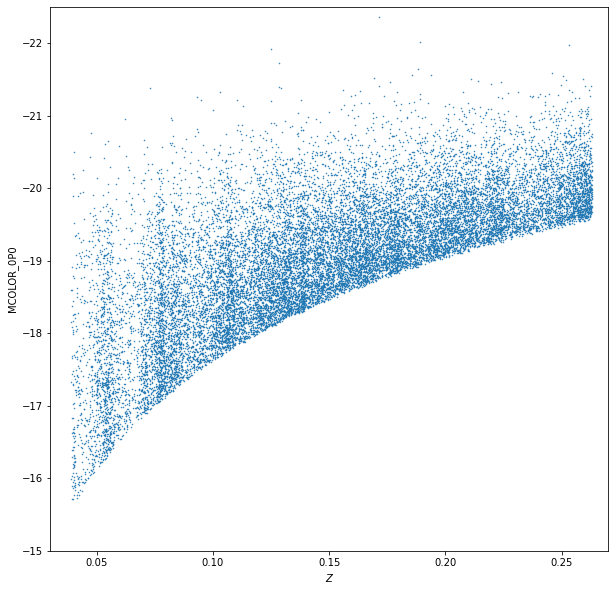

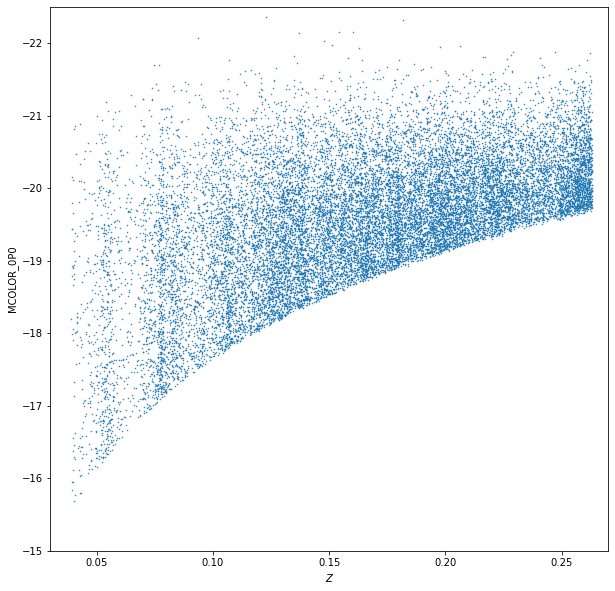

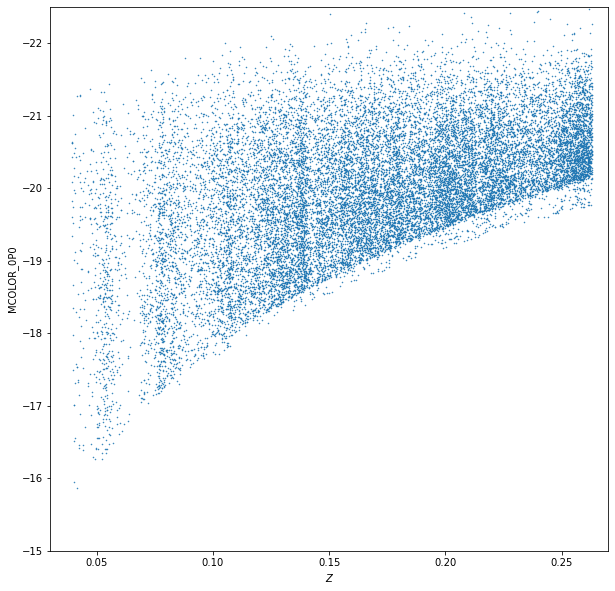

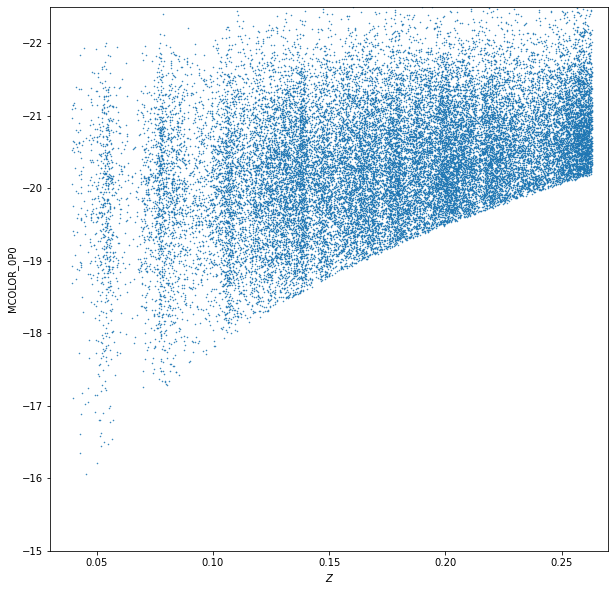

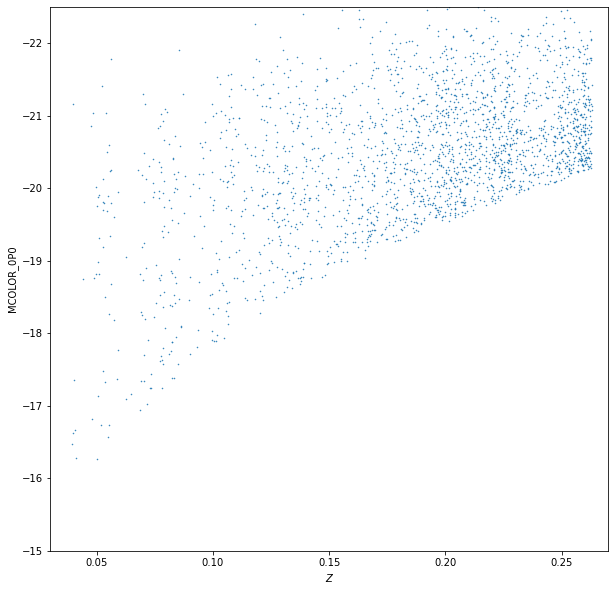

In [12]:
for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    pl.sca(ax)
    
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx

    plt.scatter(gama_kE['ZGAMA'][isin], gama_kE['MCOLOR_0P0'][isin], s=0.25)

    plt.xlabel(r'$Z$')
    plt.ylabel(r'MCOLOR_0P0')
    plt.xlim(0.03, 0.27)
    plt.ylim(-15., -22.5)    
    pl.show()

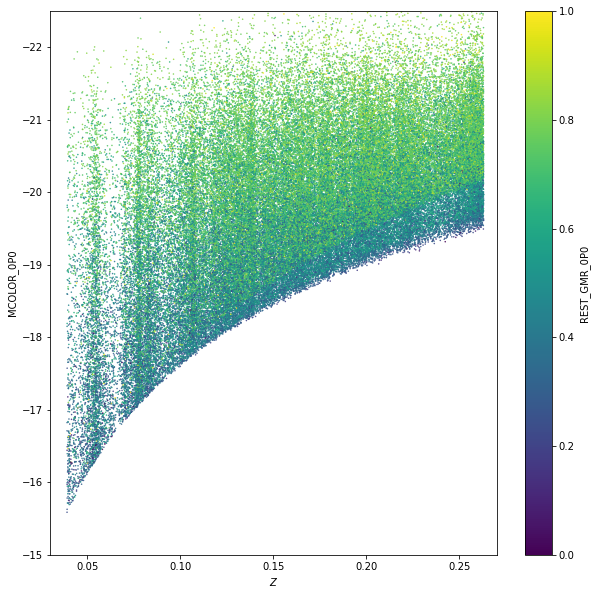

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], c=gama_kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$Z$')
plt.ylabel(r'MCOLOR_0P0')
plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)
plt.colorbar(label='REST_GMR_0P0')

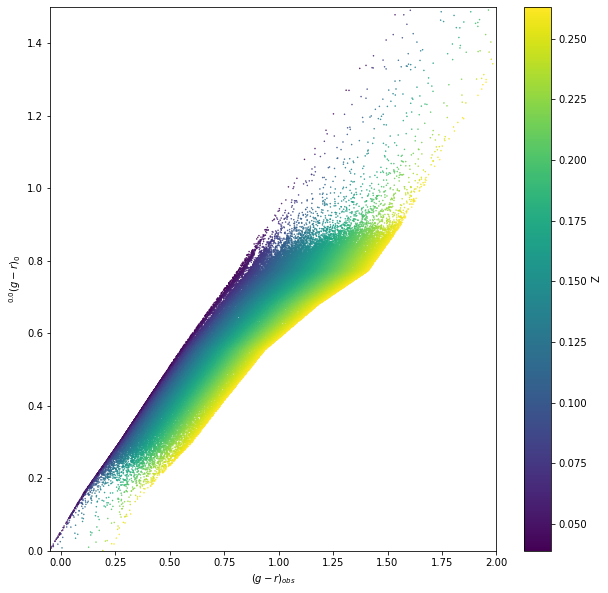

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['GMR'], gama_kE['REST_GMR_0P0'], c=gama_kE['ZGAMA'], s=0.25)
plt.xlabel(r'$(g-r)_{obs}$')
plt.ylabel(r'$^{0.0}(g-r)_0$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='Z')

In [15]:
np.unique(gama_kE['REST_GMR_0P1_WARN'].data)

array([0, 1, 2])

In [16]:
spurious = gama_kE[gama_kE['REST_GMR_0P1_WARN'].data > 0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64
300927,587726032227270668,131.3272206,1.09080836,18.831516,0.11724,4,G09_Y1_BN1_028,6,24.28935,17.80039,19.094442,18.916586,18.537155,383.7810583202455,37.92041768068411,-1.2940521,-99.0,2,1,-0.11355235418841823,-0.09522954963889844,0.04772836511795585,0.032615061849726304,-1.278938820755208,2.12,-0.1137228,-0.24854878,-19.02290697872443,-18.888081004021593,37.85442324459357,37.719597269890734
250320,587726015084036103,214.45952369,2.03787936,19.563774,0.05858,4,G15_Y4_218_043,5,20.229671,18.227365,19.269266,18.401218,16.841839,183.83041848711568,36.32208687932179,-1.0419006,-99.0,2,1,-0.09754854335440243,-0.11801539778529962,0.06373217595197166,0.009829213703325124,-0.9879976725169785,2.12,-0.0568226,-0.12418959,-16.765222344681252,-16.69785535348915,36.32899645356797,36.261629462375865
3586069,587729150376542291,134.93433216,-1.68857138,19.048208,0.1016,4,G09_Y4_207_081,6,21.36026,21.069447,18.996756,18.712885,18.48635,328.9673509561406,37.58576398818161,2.072691,-99.0,2,1,-0.10426733235617135,-0.10277204141208078,0.057013386950202735,0.025072570076543968,2.1046317806187758,0.8,-0.098552,-0.08128,-18.496017134934633,-18.513289137929647,37.54422537162897,37.56149737462398
463329,587729774758658180,212.50919903,-1.23042467,18.993248,0.11687,4,G15_Y1_AX2_304,6,21.856676,21.307579,19.185923,18.606459,18.508097,382.47198080656693,37.91299812520232,2.1216564,-99.0,2,1,-0.11330226386937975,-0.09542074191814612,0.04797845543699433,0.03242386957047863,2.1372110037131953,0.8,-0.11336391,-0.093496,-18.85436468805833,-18.8742325925426,37.847612673898176,37.86748057838245
106622,587722984440529032,216.71278177,0.96640172,18.756065,0.14396,4,G15_Y1_DN2_023,6,21.890177,20.875301,18.743675,18.292803,17.95915,479.8846167913046,38.405684141934145,2.1316261,-99.0,2,1,-0.1345413892617163,-0.07978275998180517,0.026739330044657783,0.048061851506819575,2.1103036076882287,0.8,-0.13964121,-0.115168,-19.53671689288964,-19.561190105549,38.29278226154198,38.31725547420134
376803,587727943490601117,135.15747214,1.46673551,19.284964,0.05207,4,G09_Y2_010_233,6,18.484238,19.773998,17.6414,17.31554,17.007395,162.60301546426533,36.05564297650389,2.1325989,-99.0,2,1,-0.09974506342315637,-0.11966564751392851,0.061535655883217716,0.008178963974696238,2.1859555688616465,0.8,-0.0505079,-0.041656,-16.781707125225253,-16.790559025922008,36.06667073301334,36.075522633710094
64501,587722982831030680,219.36930883,-0.26832705,18.0969,0.13763,4,G15_Y3_033_005,6,21.164711,20.593689,18.45563,18.068895,17.772223,456.840701987018,38.29882395102362,2.1380596,-99.0,2,1,-0.1291273968767528,-0.08373353714976081,0.032153322429621295,0.04411107433886394,2.1261018641796245,0.8,-0.1335011,-0.110104,-20.100575235951908,-20.12397233145333,38.197476175893314,38.22087327139474
422141,587728879792685436,129.64207134,2.58860397,19.5044,0.13235,4,G09_Y4_257_302,5,23.387367,21.773174,19.584581,18.8261,18.776506,437.7500514972836,38.20613102923127,2.188593,-99.0,2,1,-0.12479405758821707,-0.08689108139442707,0.03648666171815701,0.04095353009419768,2.184126042390561,0.8,-0.12837951,-0.10588,-18.609837928800573,-18.632337437956323,38.11423818209647,38.13673769125222


# Done.